In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:/Users/DELL/Desktop/data/Python/datasets/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1 , inplace= True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
mean_value = df.Age.mean()

In [10]:
df['Age'].fillna(mean_value,inplace = True)

In [11]:
df= df.dropna()

In [12]:
varlist = ['Sex']
def binary_map(x):
    return x.map({'male':1,'female':0})
df[varlist] = df[varlist].apply(binary_map)

In [13]:
status = pd.get_dummies(df['Embarked'], drop_first= True)
df = pd.concat([df,status],axis =1)

In [14]:
df.drop(['Embarked'],axis=1,inplace= True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


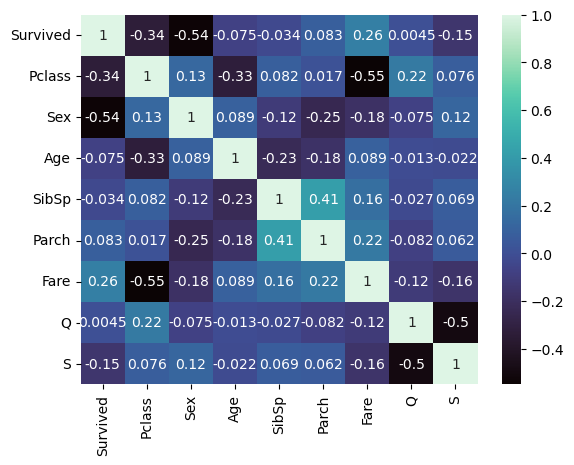

In [16]:
sns.heatmap(df.corr(),cmap='mako', annot= True)
plt.show()

In [17]:
X = df.drop(['Survived'],axis=1)
y= df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [ ]:
len(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
confusion = metrics.confusion_matrix(y_test , y_pred)
print(confusion)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))

In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
classifier= RandomForestClassifier(random_state=42)

In [28]:
classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: (accuracy:2f)')

Accuracy: (accuracy:2f)


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       167
           1       0.69      0.66      0.68       100

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.75       267
weighted avg       0.76      0.76      0.76       267

